In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.model_selection import KFold,cross_val_score
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import json

In [2]:
df = pd.read_csv('census.csv')
df.columns = df.columns.str.strip()
df

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
dict(df.iloc[-3,:])

{'age': 58,
 'workclass': ' Private',
 'fnlgt': 151910,
 'education': ' HS-grad',
 'education-num': 9,
 'marital-status': ' Widowed',
 'occupation': ' Adm-clerical',
 'relationship': ' Unmarried',
 'race': ' White',
 'sex': ' Female',
 'capital-gain': 0,
 'capital-loss': 0,
 'hours-per-week': 40,
 'native-country': ' United-States',
 'salary': ' <=50K'}

In [4]:
'''{'age': 22,
 'workclass': ' Private',
 'fnlgt': 201490,
 'education': ' HS-grad',
 'education-num': 9,
 'marital-status': ' Never-married',
 'occupation': ' Adm-clerical',
 'relationship': ' Own-child',
 'race': ' White',
 'sex': ' Male',
 'capital-gain': 0,
 'capital-loss': 0,
 'hours-per-week': 20,
 'native-country': ' United-States'}'''.replace("'",'"').replace('\n','')

'{"age": 22, "workclass": " Private", "fnlgt": 201490, "education": " HS-grad", "education-num": 9, "marital-status": " Never-married", "occupation": " Adm-clerical", "relationship": " Own-child", "race": " White", "sex": " Male", "capital-gain": 0, "capital-loss": 0, "hours-per-week": 20, "native-country": " United-States"}'

In [5]:
{k:(eval(v) if v.isnumeric() else v) for k,v in dictr.items()}

NameError: name 'dictr' is not defined

In [ ]:
pd.DataFrame({"age": 52, "workclass": " Self-emp-inc", "fnlgt": 287927, "education": " HS-grad", "education-num": 9, "marital-status": " Married-civ-spouse", "occupation": " Exec-managerial", "relationship": " Wife", "race": " White", "sex": " Female", "capital-gain": 15024, "capital-loss": 0, "hours-per-week": 40, "native-country": " United-States", "salary": " >50K"},index=[0])

In [6]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [7]:
df_obj

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [ ]:
import plotly.express as px
px.histogram(df['capital-gain'])

In [9]:
px.histogram(df['capital-loss'])

In [10]:
px.histogram(df['hours-per-week'])

In [11]:
df = df[(df['capital-gain']<28000) & (df['capital-loss']<2800)]
df

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
num_ft = df.dtypes[df.dtypes=='int64'].index.tolist()
cat_ft = df.dtypes[df.dtypes!='int64'].index.tolist()[:-1]

for cat in cat_ft:
    print(f'{cat}:{df[cat].unique()}')

workclass:['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education:['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status:['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation:['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship:['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race:['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex:['Male' 'Female']
native-country:['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 

In [13]:
df = df[~((df['workclass']=='?') | (df['occupation']=='?') | (df['native-country']=='?'))]

In [14]:
df

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<AxesSubplot:>

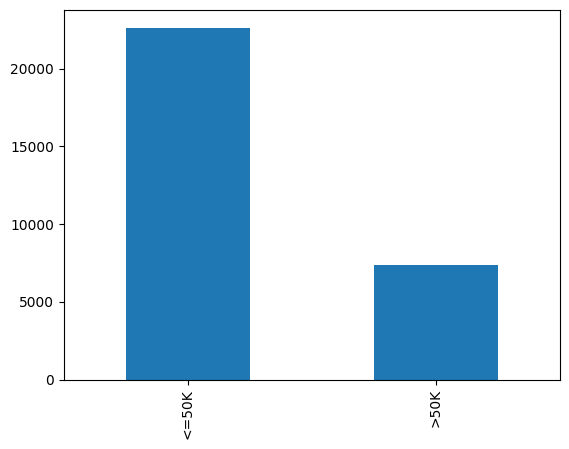

In [15]:
df['salary'].value_counts().plot(kind='bar')

In [16]:
df['salary']= df['salary'].map({'>50K':1,'<=50K':0})
df['sex']=df['sex'].map({'Male':1,'Female':0})
y=df.pop('salary')

/tmp/ipykernel_20059/946850683.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20059/946850683.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 29993, dtype: int64

In [18]:
#Converting 2 columns into binary 
dummies = pd.get_dummies(df.loc[:,cat_ft])
df = pd.concat([df,dummies],axis=1)
pd.set_option('display.max_columns',100)
df

# le_dict = {}
# le = LabelEncoder()
# for cat in cat_ft:
#     if cat=='sex':
#         continue
#     df.loc[:,cat] = le.fit_transform(df[cat])
#     le_dict[cat] = list(le.classes_)

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sex,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-Stat

In [20]:
cat_ft = json.load(open('../data/cat_ft.json'))
cat_ft

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'native-country']

In [33]:
data = df
data.columns[(data.columns.isin(num_ft))]

Index(['age', 'fnlgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [17]:
with open('le_dict.json', 'w') as f:
    json.dump(le_dict, f)

In [18]:
scaler = StandardScaler()
for col in num_ft:
    df[col] = scaler.fit_transform(df[[col]])
    dump(scaler, col+'_std_scaler.bin', compress=True)

/tmp/ipykernel_23019/3726795893.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_23019/3726795893.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_23019/3726795893.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2

In [19]:
load('age_std_scaler.bin')

StandardScaler()

In [20]:
df = df.drop(columns=cat_ft)

In [21]:
list(set([x if '_' not in x else x[:x.find('_')] for x in df.columns]))

['hours-per-week',
 'capital-loss',
 'fnlgt',
 'age',
 'capital-gain',
 'education-num']

In [28]:
# from imblearn.over_sampling import BorderlineSMOTE
# from collections import Counter

# oversample = BorderlineSMOTE()
# X,Y = oversample.fit_resample(df,y)
# Counter(Y)

X,Y = df,y

In [29]:
xgboost=XGBClassifier(use_label_encoder=False)
lgbm = LGBMClassifier()

In [30]:
model = cross_validate(xgboost, X, Y, cv = 5,scoring='f1',return_train_score=True)

/home/daniel/miniconda3/envs/[envname]/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/home/daniel/miniconda3/envs/[envname]/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/home/daniel/miniconda3/envs/[envname]/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/home/daniel/miniconda3/envs/[envname]/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/home/daniel/miniconda3/envs/[envname]/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



In [31]:
model

{'fit_time': array([0.35606503, 0.32450891, 0.64079762, 0.33821154, 0.5590601 ]),
 'score_time': array([0.00389576, 0.00373006, 0.00386524, 0.00378633, 0.00385141]),
 'test_score': array([0.58656654, 0.59782609, 0.60322714, 0.57783418, 0.585     ]),
 'train_score': array([0.65997309, 0.65514028, 0.66541978, 0.65309976, 0.65692821])}

In [32]:
X_train, X_test, y_train, y_test  = train_test_split(X,Y, test_size=0.20, random_state=11)

In [33]:
lgbm.fit(X_train,y_train)
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
type(xgboost) == 'xgboost.sklearn.XGBClassifier'

False

In [35]:
print("lgbm classification score",lgbm.score(X_train,y_train))
print("xgboost classification score",xgboost.score(X_train,y_train))

lgbm classification score 0.8530049178961407
xgboost classification score 0.8635075435525548


In [36]:
lgbm_ypred = lgbm.predict(X_test)
xgboost_ypred = xgboost.predict(X_test)

In [37]:
lgbm_conf_mat = confusion_matrix(y_test,lgbm_ypred)
print("confusion matrix")
pd.DataFrame(lgbm_conf_mat)

confusion matrix


,0,1
0,4278,214
1,768,739


In [ ]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_ypred)
print("confusion matrix")
pd.DataFrame(xgboost_conf_mat)

In [ ]:
lgbm_report = classification_report(y_test,lgbm_ypred)
print(" lgbm classification_report" ,'\n',lgbm_report)

In [ ]:
xgboost_report = classification_report(y_test,xgboost_ypred)
print(" xgboost classification_report" ,'\n',xgboost_report)

In [ ]:
print(roc_auc_score(y_test,lgbm.predict(X_test)))
print(roc_auc_score(y_test,xgboost.predict(X_test)))

In [ ]:
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(lgbm,X,Y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,Y,cv=5).mean())

In [ ]:
xgboost.save_model("xgb_model.pkl")

In [ ]:
with open('cat_ft.json', 'w') as f:
    json.dump(cat_ft, f)
with open('num_ft.json', 'w') as f:
    json.dump(num_ft, f)

In [ ]:
json.load(open('cat_ft.json'))

In [ ]:
set(list(xgboost.predict(X)))

In [ ]:
model_xgb_2 = XGBClassifier()
model_xgb_2.load_model("xgb_model.pkl")

In [ ]:
set(list(model_xgb_2.predict(X)))

In [1]:
import pickle

model = pickle.load(open('../model/gridxgb_model.pkl', 'rb'))

model
    

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('borderlinesmote',
                                        BorderlineSMOTE(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=No...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42, ...))]),
             param_grid={'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
                         'xgbclassifier__gamma': [0.5, 1, 2, 5, 10],
                         'xgbclassifier__max_depth': [10, 100, 500],
                         'xgbclassifier__min_child_weight': [1, 10, 50],
                         'xgbclassifier__n_estimators': [100, 400, 800],
                         'xgbclassifier__subsample': [0.6, 0.8, 1.0]},
             scoring='f1')

In [2]:
model.feature_names_in_

array(['age', 'fnlgt', 'education-num', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_Adm-clerical',
       'occupation_Armed-Forc

In [3]:
import pandas as pd
import numpy as np
import json

In [30]:
from sklearn.metrics import fbeta_score, precision_score, recall_score

def compute_model_metrics(y, preds):
    """
    Validates the trained machine learning model using precision, recall, and F1.

    Inputs
    ------
    y : np.array
        Known labels, binarized.
    preds : np.array
        Predicted labels, binarized.
    Returns
    -------
    precision : float
    recall : float
    fbeta : float
    """
    fbeta = fbeta_score(y, preds, beta=1, zero_division=1)
    precision = precision_score(y, preds, zero_division=1)
    recall = recall_score(y, preds, zero_division=1)
    return precision, recall, fbeta

In [3]:
init_data = pd.read_csv('census.csv')

init_data

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [46]:
idx[idx==False].index

1145     False
1256     False
1361     False
1406     False
1482     False
         ...  
28828    False
29483    False
29619    False
29864    False
30125    False
Length: 161, dtype: bool

In [4]:
data = pd.read_csv('pre_train_data.csv')

data

,age,fnlgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.105263,-0.840900,0.75,0.0,2174.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.684211,-0.792608,0.75,0.0,0.0,0.0,-5.4,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.052632,0.310172,-0.25,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.842105,0.469128,-0.75,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.473684,1.333186,0.75,-1.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,-0.526316,0.657301,0.50,-1.0,0.0,0.0,-0.4,0,0,1,...,0,0,0,0,0,0,0,1,0,0
29989,0.157895,-0.200423,-0.25,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
29990,1.105263,-0.220956,-0.25,-1.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
29991,-0.789474,0.192206,-0.25,0.0,0.0,0.0,-4.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [5]:
data[model.feature_names_in_.tolist()]

,age,fnlgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.105263,-0.840900,0.75,0.0,2174.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.684211,-0.792608,0.75,0.0,0.0,0.0,-5.4,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.052632,0.310172,-0.25,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.842105,0.469128,-0.75,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.473684,1.333186,0.75,-1.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,-0.526316,0.657301,0.50,-1.0,0.0,0.0,-0.4,0,0,1,...,0,0,0,0,0,0,0,1,0,0
29989,0.157895,-0.200423,-0.25,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
29990,1.105263,-0.220956,-0.25,-1.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
29991,-0.789474,0.192206,-0.25,0.0,0.0,0.0,-4.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
from joblib import load

for col in ['capital-gain','capital-loss']:
    scaler = load('std_scalers/'+col+'_std_scaler.bin')
    data[col] = scaler.inverse_transform(data[[col]])

idx = data['capital-gain'].between(-.1, 29000) & data['capital-loss'].between(-.1, 2900)

data[~idx]

,age,fnlgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
1145,1.130359,-0.220935,1.912138,0.703071,99999.0,2.842171e-14,1.584366,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1256,0.983734,-0.355708,-0.420060,0.703071,99999.0,2.842171e-14,-0.035429,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1361,1.057047,0.702490,-0.420060,0.703071,99999.0,2.842171e-14,-0.035429,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1406,0.983734,-0.679815,1.134739,0.703071,99999.0,2.842171e-14,0.774468,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1482,0.543859,1.708607,1.912138,0.703071,99999.0,2.842171e-14,1.584366,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28828,-1.215643,0.229616,-0.031360,0.703071,99999.0,2.842171e-14,1.179417,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29483,0.617171,-0.323211,1.523438,0.703071,99999.0,2.842171e-14,1.179417,0,0,1,...,0,0,0,0,0,0,0,1,0,0
29619,0.323921,-1.210368,1.912138,0.703071,99999.0,2.842171e-14,-0.035429,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29864,0.617171,0.996080,1.912138,0.703071,99999.0,2.842171e-14,-0.035429,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [7]:
data[['capital-gain','capital-loss']]

,capital-gain,capital-loss
0,2.174000e+03,2.842171e-14
1,4.547474e-13,2.842171e-14
2,4.547474e-13,2.842171e-14
3,4.547474e-13,2.842171e-14
4,4.547474e-13,2.842171e-14
...,...,...
30157,4.547474e-13,2.842171e-14
30158,4.547474e-13,2.842171e-14
30159,4.547474e-13,2.842171e-14
30160,4.547474e-13,2.842171e-14


In [14]:
sum(init_data[init_data.index.isin(data.index.tolist())][[' capital-gain',' capital-loss']].values-data[['capital-gain','capital-loss']].values)/30162

array([-1.9988396 , -1.79421126])

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(data,y, test_size=0.25, random_state=11)

score = compute_model_metrics(y_test,gridcv.predict(X_test))

fixes = {}
fixes['main'] = dict(zip(['precision','recall','f1'],list(score)))

NameError: name 'y' is not defined

In [24]:
cat_ft = json.load(open('cat_ft.json'))

fixes = 
for col in cat_ft:
    fixes[col] = {}
    for slice in X[col].uniques():

        fixes[col][slice] = {}

        temp = X[X[col]==slice]
        y_t = y[temp.index]

        y_pred = model.predict(temp)

        metrics = compute_model_metrics(y_t,y_pred)

        fixes[col][slice]['precision'] = metrics[0]
        fixes[col][slice]['recall'] = metrics[1]
        fixes[col][slice]['f1'] = metrics[2]

NameError: name 'fixes' is not defined

In [ ]:
dict(zip(['precision','recall','f1'],[0.6867167919799498, 0.7800711743772242, 0.7304231922692437]))